# Análisis de distribución de especies nativas y cumplimiento de consideraciones de plantación, utilizando dataset de arbolado lineal de la Ciudad (2017-2018)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [10]:
sns.set()
sns.set_context("talk")
pd.set_option('display.max_columns', None)

In [3]:
df_arbolado = pd.read_csv('arbolado-publico-lineal-2017-2018.csv', index_col="nro_registro")
print(df_arbolado.shape)
df_arbolado.head()

C:\Users\Javo\AppData\Local\Temp\ipykernel_6668\2739643749.py:1: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_arbolado = pd.read_csv('arbolado-publico-lineal-2017-2018.csv', index_col="nro_registro")


(370180, 17)


,long,lat,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
nro_registro,,,,,,,,,,,,,,,,,
26779,-58.378563,-34.594902,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
30887,-58.381532,-34.592319,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
30904,-58.379103,-34.591939,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
31336,-58.380710,-34.591548,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
31337,-58.380710,-34.591548,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


## Árboles nativos

Filtramos por árboles nativos

- Ceibo: Erythrina crista-galli
- Jacarandá: Jacaranda mimosifolia
- Palo borracho: Ceiba speciosa
- Tipa: Tipuana tipu
- Timbó: Enterolobium contortisiliquum
- Ibirá-pitá: Peltophorum dubium
- Guarán -guarán: Tecoma stans
- Aliso de río: Tessaria integrifolia (este no esta en el de arbolado lineal)
- Sauce criollo: Salix humboldtiana
- Aguaribay: Schinus molle
- Curupí: Sapium haematospermum
- Ombú: Phytolacca dioica
- Fumo Bravo: Solanum granulosum-leprosum
- Lapacho: Handroanthus impetiginosus

In [4]:
df_arbolado = df_arbolado.drop(
    columns=["tipo_activ", "calle_chapa", "manzana", "calle_chapa", "diametro_altura_pecho", "altura_arbol", "direccion_normalizada"]
)

In [5]:
df_arbolado = df_arbolado.dropna(subset=["long", "lat"])

In [6]:
especies_nativas = {
    "Ceibo": "Erythrina crista-galli",
    "Jacarandá": "Jacaranda mimosifolia", 
    "Palo borracho": "Ceiba speciosa", 
    "Tipa": "Tipuana tipu",
    "Timbó": "Enterolobium contortisiliquum", 
    "Ibirá-pitá": "Peltophorum dubium", 
    "Guarán -guarán": "Tecoma stans", 
    "Sauce criollo": "Salix humboldtiana",
    "Aguaribay": "Schinus molle", 
    "Curupí": "Sapium haematospermum", 
    "Ombú": "Phytolacca dioica",
    "Fumo Bravo": "Solanum granulosum-leprosum", 
    "Lapacho": "Handroanthus impetiginosus"
}
df_arbolado_nativos = df_arbolado[df_arbolado["nombre_cientifico"].isin(especies_nativas.values())]

In [7]:
df_arbolado_nativos

,long,lat,comuna,calle_nombre,calle_altura,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera
nro_registro,,,,,,,,,,,
26779,-58.378563,-34.594902,1,Esmeralda,1000.0,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel
30887,-58.381532,-34.592319,1,Pellegrini Carlos,1300.0,Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada
31337,-58.380710,-34.591548,1,Arroyo,900.0,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel
31864,-58.373356,-34.594871,1,Reconquista,1100.0,En frente,Jacaranda mimosifolia,NaN,Ocupada,NaN,A nivel
31354,-58.380812,-34.591559,1,Arroyo,900.0,Exacta,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel
...,...,...,...,...,...,...,...,...,...,...,...
545682,-58.477279,-34.582165,15,Marsella,2500.0,LD 13,Enterolobium contortisiliquum,NaN,Ocupada,Regular,A Nivel
545935,-58.470559,-34.595531,15,Punta Arenas Av.,1500.0,LA1,Tipuana tipu,NaN,Ocupada,NaN,NaN
545936,-58.470559,-34.595531,15,Punta Arenas Av.,1500.0,LA2,Tipuana tipu,NaN,Ocupada,NaN,NaN


In [8]:
df_arboles_count = df_arbolado_nativos["nombre_cientifico"].value_counts()
df_arboles_mt400 = df_arboles_count[df_arboles_count > 400]
df_arbolado_nativos_mt400 = df_arbolado_nativos[df_arbolado_nativos["nombre_cientifico"].isin(df_arboles_mt400.index)]
print(df_arboles_mt400)

Jacaranda mimosifolia         13003
Tipuana tipu                   8467
Ceiba speciosa                 1658
Handroanthus impetiginosus     1324
Tecoma stans                    789
Peltophorum dubium              592
Erythrina crista-galli          497
Name: nombre_cientifico, dtype: int64


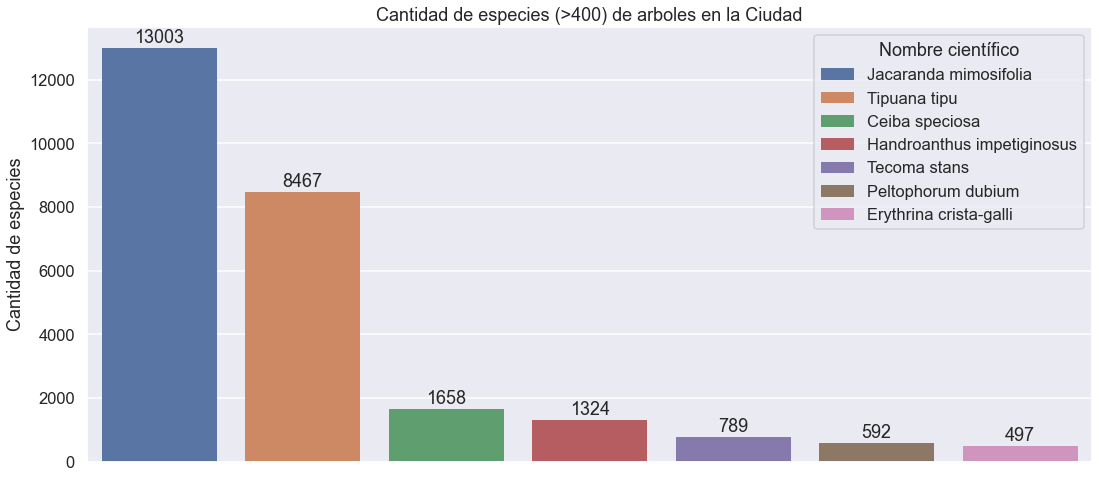

In [11]:
plt.figure(figsize=(18, 8))
cplot = sns.countplot(
    data=df_arbolado_nativos_mt400,
    x="nombre_cientifico",
    order=df_arboles_mt400.index,
    hue="nombre_cientifico",
    hue_order=df_arboles_mt400.index,
    linewidth=0,
    dodge=False
)
for p in cplot.patches:
    cplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.title("Cantidad de especies (>400) de arboles en la Ciudad")
plt.ylabel("Cantidad de especies")
plt.xlabel("")
plt.legend(title="Nombre científico")
plt.show()

## Filtrado por especie Erythrina crista-galli (Ceibo)

Filtro por Erythrina crista-galli para visualuzarlo en el mapa al final

In [12]:
df_ceibos = df_arbolado_nativos_mt400[df_arbolado_nativos_mt400["nombre_cientifico"] == "Erythrina crista-galli"]
df_ceibos

,long,lat,comuna,calle_nombre,calle_altura,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera
nro_registro,,,,,,,,,,,
60370,-58.380236,-34.617138,1,Irigoyen Bernardo de,700.0,NaN,Erythrina crista-galli,8.4,Ocupada,Regular,A nivel
60531,-58.368700,-34.587848,1,Py Comodoro Av.,2000.0,Exacta,Erythrina crista-galli,10,Sobreocupada,Regular,A nivel
62982,-58.371627,-34.585046,1,Fels Pablo T. Cabo,300.0,LA,Erythrina crista-galli,1.6,Ocupada,Regular,A nivel
73407,-58.388679,-34.618063,1,Independencia Av,1500.0,Exacta,Erythrina crista-galli,3.4,Ocupada,Regular,A nivel
73408,-58.388347,-34.618043,1,Independencia Av,1500.0,Exacta,Erythrina crista-galli,3.4,Ocupada,Regular,A nivel
...,...,...,...,...,...,...,...,...,...,...,...
161568,-58.405804,-34.575704,14,Cavia,3200.0,LA,Erythrina crista-galli,3.2,Ocupada,Regular,A nivel
161569,-58.405804,-34.575704,14,Cavia,3200.0,LA,Erythrina crista-galli,3.2,Ocupada,Regular,A nivel
163539,-58.405804,-34.575704,14,Cavia,3200.0,LA,Erythrina crista-galli,3.2,Ocupada,Regular,NaN


## Visualización de Erythrina crista-galli en el mapa

In [13]:
gdf_arbolado = gpd.GeoDataFrame(df_ceibos, geometry=gpd.points_from_xy(df_ceibos.long, df_ceibos.lat))
gdf_arbolado.head()

,long,lat,comuna,calle_nombre,calle_altura,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,geometry
nro_registro,,,,,,,,,,,,
60370,-58.380236,-34.617138,1,Irigoyen Bernardo de,700.0,NaN,Erythrina crista-galli,8.4,Ocupada,Regular,A nivel,POINT (-58.38024 -34.61714)
60531,-58.368700,-34.587848,1,Py Comodoro Av.,2000.0,Exacta,Erythrina crista-galli,10,Sobreocupada,Regular,A nivel,POINT (-58.36870 -34.58785)
62982,-58.371627,-34.585046,1,Fels Pablo T. Cabo,300.0,LA,Erythrina crista-galli,1.6,Ocupada,Regular,A nivel,POINT (-58.37163 -34.58505)
73407,-58.388679,-34.618063,1,Independencia Av,1500.0,Exacta,Erythrina crista-galli,3.4,Ocupada,Regular,A nivel,POINT (-58.38868 -34.61806)
73408,-58.388347,-34.618043,1,Independencia Av,1500.0,Exacta,Erythrina crista-galli,3.4,Ocupada,Regular,A nivel,POINT (-58.38835 -34.61804)


In [14]:
df_barrios = pd.read_csv('barrios.csv', sep=";")
df_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,MULTIPOLYGON (((-58.4528200492791 -34.59598865...,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,MULTIPOLYGON (((-58.4655768128541 -34.59655770...,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,MULTIPOLYGON (((-58.4237529813037 -34.59782733...,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,MULTIPOLYGON (((-58.4946097568899 -34.61486523...,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,MULTIPOLYGON (((-58.4128700313088 -34.61411625...,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


In [15]:
df_barrios['WKT'] = df_barrios["WKT"].apply(wkt.loads)
gdf_barrios = gpd.GeoDataFrame(df_barrios, geometry='WKT')

In [16]:
gdf_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...",PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...",VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


In [41]:
gdf_barrios["coords"] = gdf_barrios["WKT"].apply(lambda x: x.representative_point().coords[:])
gdf_barrios["coords"] = [coords[0] for coords in gdf_barrios["coords"]]

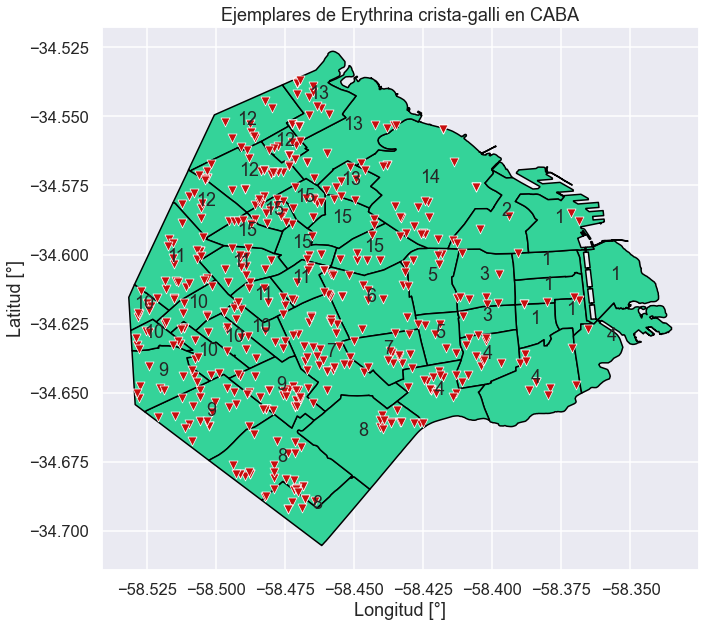

In [60]:
ax_barrios = gdf_barrios.plot(edgecolor="black", figsize=(40, 10), color="#34d399")
gdf_barrios.apply(lambda x: ax_barrios.annotate(text=f"{x['COMUNA']:.0f}", xy=x.WKT.centroid.coords[0], ha='center'), axis=1);
sns.scatterplot(data=gdf_arbolado, x="long", y="lat", ax=ax_barrios, color="#c80d0e", marker="v")
ax_barrios.set(title="Ejemplares de Erythrina crista-galli en CABA")
plt.ylabel("Latitud [°]")
plt.xlabel("Longitud [°]")
plt.show()

## Detección de planteras vacías para plantar especie Erythrina crista-galli

In [18]:
df_arbolado["estado_plantera"].unique()

array(['Ocupada', 'Sobreocupada', 'Subocupada', 'Vacía', 'Ocupada ',
       'Cerrada', 'Parcialmente cerrada', 'SobreOcupada', 'ocupada',
       'sobreocupada', 'Sobreocupada parc. cerrada', 'Cantero ocupado'],
      dtype=object)

In [19]:
df_arbolado[df_arbolado["estado_plantera"] == "Vacía"]

,long,lat,comuna,calle_nombre,calle_altura,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera
nro_registro,,,,,,,,,,,
62850,-58.376398,-34.592801,1,Juncal,600.0,Exacta,No identificado,7.6,Vacía,Regular,A nivel
317505,-58.455136,-34.631652,7,Directorio Av.,1900.0,Exacta,Schefflera arboricola,2.8,Vacía,Regular,Bajo nivel
326404,-58.435183,-34.638624,7,Saraza,1200.0,Exacta,No identificado,3.2,Vacía,Regular,Elevada


No hay suficiente cantidad de planteras vacías para realizar un plan estratégico en base a este criterio.

## Comunas con menor densidad de arbolado (lineal)

Debido a lo anterior, enfocamos el análisis en detectar las comunas con menor densidad de árboles, con tal de poder instalar nuevas planteras para los ceibos. Vamos por este camino también porque no hay consideraciones específicas para esta especie elegida

In [20]:
df_arbolado_comunas = df_arbolado.groupby("comuna")["nombre_cientifico"] \
    .count() \
    .reset_index(name='arboles') \
    .sort_values(['arboles'], ascending=False)
df_arbolado_comunas

,comuna,arboles
11,12,37111
8,9,35796
10,11,35478
9,10,32445
3,4,30066
14,15,28214
12,13,27267
6,7,25382
13,14,21162
7,8,19898


In [21]:
df_arbolado_comunas.arboles.max()

37111

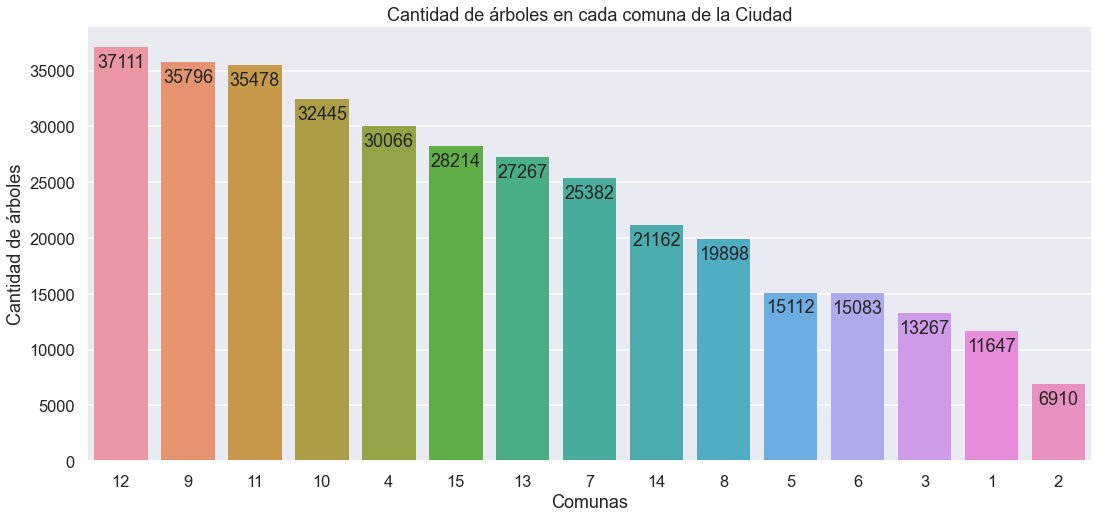

In [22]:
plt.figure(figsize=(18, 8))
cplot = sns.countplot(
    data=df_arbolado,
    x="comuna",
    order=df_arbolado_comunas.comuna,
    hue="comuna",
    hue_order=df_arbolado_comunas.comuna,
    linewidth=0,
    dodge=False
)
for p in cplot.patches:
    cplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0, -15),
        textcoords = 'offset points'
    )
plt.title("Cantidad de árboles en cada comuna de la Ciudad")
plt.ylabel("Cantidad de árboles")
plt.xlabel("Comunas")
plt.legend([],[], frameon=False)
plt.show()

In [23]:
df_arbolado[df_arbolado["comuna"].isin([1, 2, 3])]

,long,lat,comuna,calle_nombre,calle_altura,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera
nro_registro,,,,,,,,,,,
26779,-58.378563,-34.594902,1,Esmeralda,1000.0,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel
30887,-58.381532,-34.592319,1,Pellegrini Carlos,1300.0,Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada
30904,-58.379103,-34.591939,1,Arroyo,800.0,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel
31336,-58.380710,-34.591548,1,Arroyo,900.0,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel
31337,-58.380710,-34.591548,1,Arroyo,900.0,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel
...,...,...,...,...,...,...,...,...,...,...,...
500799,-58.397440,-34.610586,3,Pasco,100,LD11,Acer negundo,4.2,Ocupada,Regular,Bajo Nivel
500800,-58.397440,-34.610586,3,Pasco,100,LD12,Fraxinus pennsylvanica,4.2,Ocupada,Regular,A Nivel
500801,-58.397440,-34.610586,3,Pasco,100,LD13,Acer negundo,4.2,Ocupada,Regular,A Nivel
